In [19]:
import pandas;
import seaborn as sb;
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

def readCSVFile(file):
    data=pandas.read_csv(file,",",header=0, na_values='?', skipinitialspace=True);
    return data;
    pass;
def readTrainData(dataset):    
    return dataset.ix[:,1:-1], dataset.ix[:,-1:];
    pass;

def readTestData(dataset):    
    return dataset.ix[:,1:],dataset.ix[:,0:1];
    pass;

def normalizePhi(unNormalizedPhi,last_col_bias=False):    
    #assuming last column as bias column
    no_of_column=len(unNormalizedPhi[0]);
    phi=np.array(unNormalizedPhi);
    print("Normalizing Phi...");  
    std=phi.std(0);
    mean=phi.mean(0);    
    std[no_of_column-1]=1;
    mean[no_of_column-1]=0;
    #phi_normalize=(phi-mean)/std;    
    
    max_vector=phi.max(axis=0)
    phi_normalize=phi/max_vector;    
    
    print("Normalization done.");
    return phi_normalize;
    pass;

def writeTestData(test_id,ystar,filenumber=0):    
    fo = open("sampleSubmission-"+str(filenumber)+".csv", "w");               
    fo.write("id,salary\n");
    m=len(ystar);
    for i in range(m):
        fo.write(str(test_id[i][0])+","+str(ystar[i][0])+"\n");
    fo.close();
    pass;

def dropColumns(dataframe,colList):
    for c in colList:
        dataframe.drop([c], axis = 1, inplace = True);
    pass;

def addColByCategory(dataset):
    return pandas.get_dummies(dataset);
    pass;

def categoryToNumber(dataset,categoryList):
    for c in categoryList:
        if (c in dataset):            
            dataset[c]=pandas.get_dummies(dataset[c]).values.argmax(1);        
    return dataset;
    pass;
    

def handleCategoryData(dataset,categoryList=None,byNumber=False):
    if(byNumber):
        return categoryToNumber(dataset,categoryList)
    else:
        return addColByCategory(dataset);
def findMostFrequentCount(dataset):
    #arr=dataset;
    #axis = 0
    #u, indices = np.unique(arr, return_inverse=True)
    #print(u);
    #u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(arr.shape),None, np.max(indices) + 1), axis=axis)]
    x = np.array([0, 1, 1, 3, 2, 1, 2, 3]);
    w=np.bincount(dataset[:,1].astype(int))#work-class: Private
    o=np.bincount(dataset[:,6].astype(int))#occupation: Married-civ-spouse
    c=np.bincount(dataset[:,13].astype(int))#country : US
    pass;

def fillNanValue(dataframe,col,value):
    if (col in dataframe):
        dataframe[col].fillna(value, inplace=True);
    pass;

def imputeUnknowValue(dataframe):
    #by most frequent value;
    fillNanValue(dataframe,"workclass","Private");
    fillNanValue(dataframe,"occupation","Craft-repair");
    fillNanValue(dataframe,"native-country","United-States");
    pass;

def addRemainingCol(colList,dataframe,rowCount):
    i=0;
    for c in colList:
        if( c not in dataframe):
            dataframe.insert(i, c, 0);
        i+=1;
    pass;

In [2]:
#--settings--
pandas.set_option('display.max_columns', None);
#---init---
dir="data/"
trainFile=dir+"train.csv";
testFile=dir+"kaggle_test_data.csv";
categoryList=["workclass","education","marital-status","occupation","relationship","race","sex","native-country"];
drop_col=['native-country',"race"]
trained_dataset=readCSVFile(trainFile);
trained_data,trained_y=readTrainData(trained_dataset);

test_dataset=readCSVFile(testFile);
test_data,test_id=readTestData(test_dataset);

#droping unrelated-columns
dropColumns(trained_data,drop_col);
dropColumns(test_data,drop_col);

#impute:
imputeUnknowValue(trained_data);
imputeUnknowValue(test_data);

#converting categorical data to point wise data
byNumber=False;
dummy_trained_data=handleCategoryData(trained_data,categoryList,byNumber);
dummy_test_data=handleCategoryData(test_data,categoryList,byNumber);


#adding missing column
trained_columns_name=list(dummy_trained_data.columns.values);
addRemainingCol(trained_columns_name,dummy_test_data,len(trained_data))
test_columns_name=list(dummy_test_data.columns.values);

#converting panda data frame to numpy martix
mtx_dummy_tds=dummy_trained_data.as_matrix(columns=None)
mtx_dummy_testds=dummy_test_data.as_matrix(columns=None)
mtx_trained_y=trained_y.as_matrix(columns=None);
mtx_test_id=test_id.as_matrix(columns=None);

#adding bias column
mtx_dummy_tds=np.column_stack((mtx_dummy_tds,np.ones((len(mtx_dummy_tds),1))))
mtx_dummy_testds=np.column_stack((mtx_dummy_testds,np.ones((len(mtx_dummy_testds),1))))

#normalization
mtx_dummy_tds_norm=normalizePhi(mtx_dummy_tds)
mtx_dummy_testds_norm=normalizePhi(mtx_dummy_testds)


#print(mtx_dummy_tds)
#print(mtx_dummy_tds_norm)
#pandas.get_dummies(trained_data.ix[:,1:2])
print("train",np.shape(mtx_dummy_tds_norm),"test",np.shape(mtx_dummy_testds_norm))

Normalizing Phi...
Normalization done.
Normalizing Phi...
Normalization done.
train (38973, 60) test (6878, 60)


In [40]:
trained_dataset['native-country'] = trained_dataset['native-country'].astype('category') 
trained_dataset['native-country'].cat.categories

Index(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
       'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'],
      dtype='object')

In [8]:
trained_dataset

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
9,12,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,0


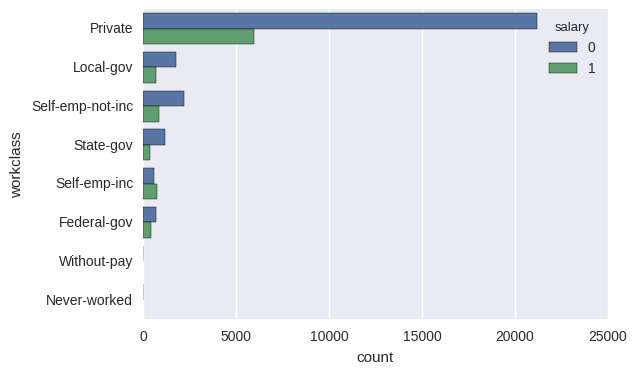

In [3]:
sb.countplot(y="workclass", hue='salary', data=trained_dataset)
#max frequent-data point is private, having salary greater than 1
# This feature is important in defining the output.

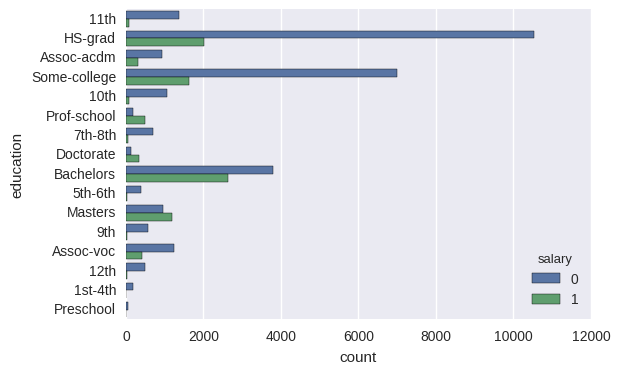

In [4]:
sb.countplot(y="education", hue='salary', data=trained_dataset)

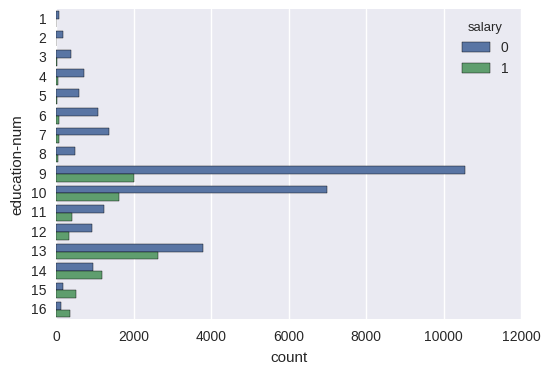

In [26]:
sb.countplot(y="education-num", hue='salary', data=trained_dataset)

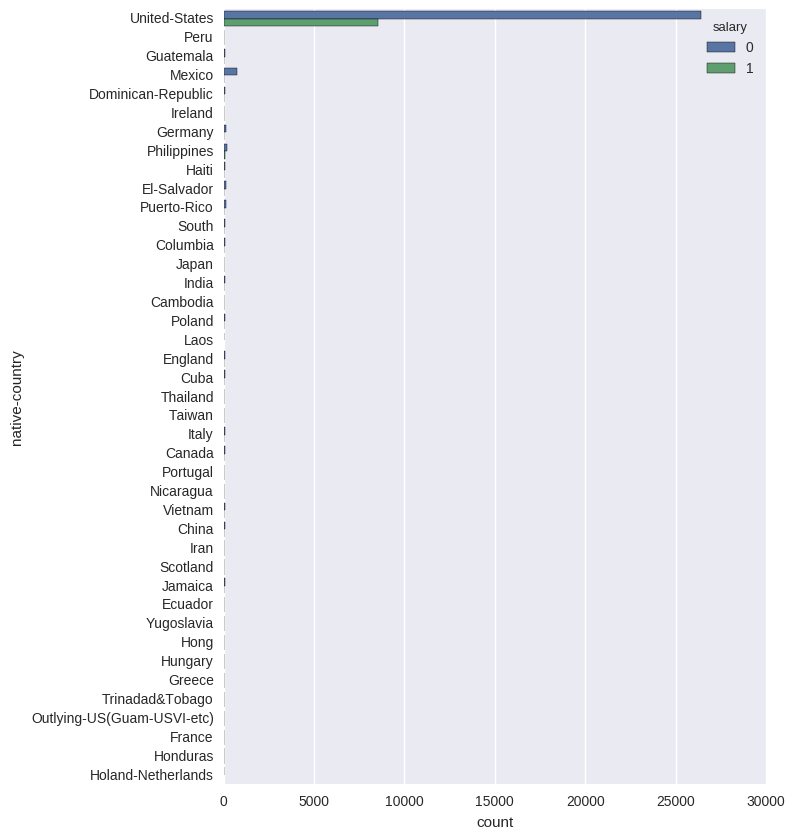

In [29]:
plt.figure(figsize=(7,10), dpi=300)
p=sb.countplot(y="native-country", hue='salary',data=trained_dataset)
#p.set_xticklabels("native-country",rotation=30)
#for item in p.get_xticklabels():
#item.set_rotation(45)

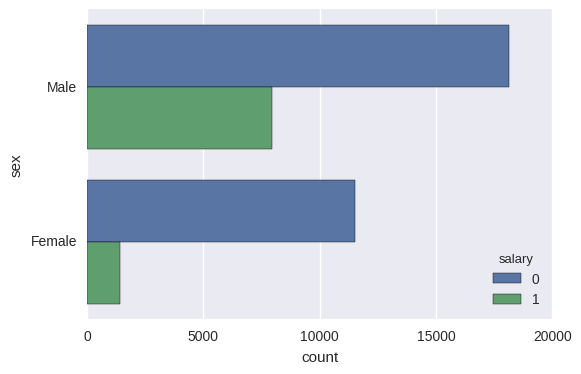

In [31]:
p=sb.countplot(y="sex", hue='salary',data=trained_dataset)

In [41]:
col="education-num";
trained_dataset[col].groupby([trained_dataset[col], trained_dataset['salary']]).count()

education-num  salary
1              0            64
               1             1
2              0           188
               1             6
3              0           389
               1            19
4              0           708
               1            43
5              0           580
               1            29
6              0          1073
               1            75
7              0          1374
               1            74
8              0           484
               1            38
9              0         10543
               1          2021
10             0          6997
               1          1634
11             0          1232
               1           414
12             0           935
               1           322
13             0          3793
               1          2627
14             0           958
               1          1193
15             0           170
               1           502
16             0           137
               1 

In [6]:
col="education-num";
trained_dataset[col].groupby([trained_dataset[col], trained_dataset['salary']]).count()

education-num  salary
1              0            64
               1             1
2              0           188
               1             6
3              0           389
               1            19
4              0           708
               1            43
5              0           580
               1            29
6              0          1073
               1            75
7              0          1374
               1            74
8              0           484
               1            38
9              0         10543
               1          2021
10             0          6997
               1          1634
11             0          1232
               1           414
12             0           935
               1           322
13             0          3793
               1          2627
14             0           958
               1          1193
15             0           170
               1           502
16             0           137
               1 

In [42]:
print("aa");

aa
